In [10]:
#Import important libraries
import torch  
import matplotlib.pyplot as plt  
import numpy as np  
import torch.nn.functional as func  
import PIL.ImageOps  
from torch import nn 
from torchvision import datasets,transforms  
from sklearn.metrics import confusion_matrix, f1_score, ConfusionMatrixDisplay, classification_report,precision_recall_fscore_support, precision_score

In [3]:
#Loading and transformation of the data
device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")  
transform1=transforms.Compose([transforms.Resize((28,28)),transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])  
training_dataset=datasets.MNIST(root='./data',train=True,download=True,transform=transform1)  
validation_dataset=datasets.MNIST(root='./data',train=False,download=True,transform=transform1)  
training_loader=torch.utils.data.DataLoader(dataset=training_dataset,batch_size=100,shuffle=True)  
validation_loader=torch.utils.data.DataLoader(dataset=validation_dataset,batch_size=100,shuffle=False) 

In [4]:
#Hidden node size
# 1st hidden layer has 64 neural node 
# 2nd hidden layer has 32 neural node 
hidden_size = [64,32] 
output_size = 10 #Number 0-9

# Neural Network Implementation

In [14]:
class Net(nn.Module):
    def __init__(self,hidden_size1,hidden_size2,output_size):
        super().__init__()
        self.conv1=nn.Conv2d(1,hidden_size1,kernel_size=3)  
        self.conv2=nn.Conv2d(hidden_size1,hidden_size2,kernel_size=3)
        self.flatten1= nn.Flatten()
        self.fully1 = nn.LazyLinear(output_size)
    def forward(self,x):
        x=func.relu(self.conv1(x))
        x=func.max_pool2d(x,2,2)
        x=func.relu(self.conv2(x))
        x=func.max_pool2d(x,2,2)
        x=self.flatten1(x)
        x=self.fully1(x)
        return x
        
        
model = Net(64,32,10)
print(model)

Net(
  (conv1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1))
  (flatten1): Flatten(start_dim=1, end_dim=-1)
  (fully1): LazyLinear(in_features=0, out_features=10, bias=True)
)


D:\anaconda3\lib\site-packages\torch\nn\modules\lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [15]:
model=Net(64,32,10).to(device)  
criteron=nn.CrossEntropyLoss()  
optimizer=torch.optim.Adam(model.parameters(),lr=0.00001)   
epochs=12

In [41]:
loss_history=[]  
correct_history=[]  
val_loss_history=[]  
val_correct_history=[] 

# Training and Validation of Neural Netwrok

In [29]:
for e in range(epochs):
    loss=0.0  
    correct=0.0  
    val_loss=0.0  
    val_correct=0.0
    for input,labels in training_loader:
        input=input.to(device)
        labels=labels.to(device)
        outputs=model(input)
        loss1=criteron(outputs,labels)
        
        optimizer.zero_grad()
        
        loss1.backward()
        optimizer.step()
        _,preds=torch.max(outputs,1)
        loss+=loss1.item()
        correct+=torch.sum(preds==labels.data) 
    else:
        with torch.no_grad():
            for val_input,val_labels in validation_loader:
                val_input=val_input.to(device)  
                val_labels=val_labels.to(device) 
                val_outputs=model(val_input)
                val_loss1=criteron(val_outputs,val_labels)
                _,val_preds=torch.max(val_outputs,1)
                val_loss+=val_loss1.item()
                val_correct+=torch.sum(val_preds==val_labels.data)
        
        epoch_loss=loss/len(training_loader)  
        epoch_acc=correct.float()/len(training_loader)  
        loss_history.append(epoch_loss)  
        correct_history.append(epoch_acc)  
        
        val_epoch_loss=val_loss/len(validation_loader)  
        val_epoch_acc=val_correct.float()/len(validation_loader)  
        val_loss_history.append(val_epoch_loss)  
        val_correct_history.append(val_epoch_acc)
        
        print('training_loss:{:.4f},{:.4f}'.format(epoch_loss,epoch_acc.item()))  
        print('validation_loss:{:.4f},{:.4f}'.format(val_epoch_loss,val_epoch_acc.item())) 
        

training_loss:0.1937,94.5350
validation_loss:0.1733,95.2200
training_loss:0.1820,94.8417
validation_loss:0.1625,95.5300
training_loss:0.1715,95.1233
validation_loss:0.1536,95.7600
training_loss:0.1623,95.3567
validation_loss:0.1455,96.0600
training_loss:0.1543,95.5950
validation_loss:0.1377,96.2800
training_loss:0.1470,95.8400
validation_loss:0.1318,96.4900
training_loss:0.1406,96.0133
validation_loss:0.1258,96.6500
training_loss:0.1348,96.1650
validation_loss:0.1207,96.7800
training_loss:0.1296,96.2933
validation_loss:0.1161,96.8100
training_loss:0.1247,96.4383
validation_loss:0.1117,96.8700
training_loss:0.1205,96.5517
validation_loss:0.1083,96.9800
training_loss:0.1166,96.6417
validation_loss:0.1044,96.9700


# Visualization

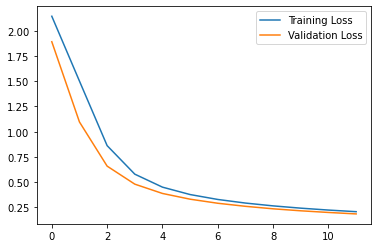

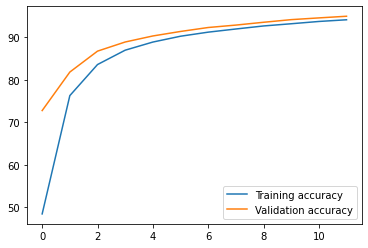

In [25]:
plt.plot(loss_history,label='Training Loss')  
plt.plot(val_loss_history,label='Validation Loss')  
plt.legend()  
plt.show()  
plt.plot(correct_history,label='Training accuracy')  
plt.plot(val_correct_history,label='Validation accuracy')  
plt.legend()  
plt.show()